# Magic State Injection Circuit for [[7,1,3]] Color Code

This implements the exact circuit from the figure that creates the logical observable qubit |ψ_L(θ,φ)⟩

In [2]:
from bloqade import squin
import bloqade.tsim

In [33]:
# Magic state injection circuit for [[7,1,3]] color code
# Exact gate sequence from the specification:
# T1: √Y† on q[0–5]
# T2: CNOT(1→{2,3,4,5})
# T3: CNOT(0→{2,4})
# T4: √Y on q[2,3,4,5]
# T5: CNOT(2→3), CNOT(4→5)
# T6: CNOT(6→{1,3,5})
# T7: √Y on q[1,2,4]

@squin.kernel
def logical_qubit(theta: float = 0.0, phi: float = 0.0):
    # Allocate 7 qubits
    q = squin.qalloc(7)
    
    # T1: √Y† on q[0–5]
    # √Y† = RY(-π/2) = -1.5707963267948966
    
    for i in [0, 1, 2, 3, 4, 5]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    
    # T2: CZ(1→2), CZ(3→4), CZ(5→6)
    for pair in [(1, 2), (3, 4), (5, 6)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])

    # T3: √Y on q[6]
    # √Y = RY(π/2) = 1.5707963267948966
    squin.ry(angle=1.5707963267948966, qubit=q[6])
    
    # T4: CZ(0→3), CZ(2→5), CZ(4→6)
    for pair in [(0, 3), (2, 5), (4, 6)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])

    # T5: √Y on q[2,3,4,5,6]
    for i in [2, 3, 4, 5, 6]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    # T6: CZ(0→1), CZ(2→3), CZ(4→5)
    for pair in [(0, 1), (2, 3), (4, 5)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4]
    for i in [1, 2, 4]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
# Visualize with white background
from IPython.display import HTML, display
tsim_circ = bloqade.tsim.Circuit(logical_qubit)
diagram = tsim_circ.diagram(height=500)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [ ]:
# two copies of the logical qubit circuit: q[0-6], q[7-13]
# Gates are applied in parallel (same timestep for both logical qubits)
@squin.kernel
def _fixed():
    q = squin.qalloc(14)  # 3 registers × 7 qubits = 21 qubits
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    
    # T2: CZ gates (parallel for both logical qubits)
    for pair in [(1, 2), (3, 4), (5, 6), (8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[6])
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 3), (2, 5), (4, 6), (7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [2, 3, 4, 5, 6, 9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 1), (2, 3), (4, 5), (7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [1, 2, 4, 8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

# Visualize with white background
from IPython.display import HTML, display
tsim_circ = bloqade.tsim.Circuit(_fixed)
diagram = tsim_circ.diagram(height=500)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [36]:
@squin.kernel
def _fixed():
    q = squin.qalloc(14)  # 3 registers × 7 qubits = 21 qubits
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(1, 2), (3, 4), (5, 6), (8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[6])
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 3), (2, 5), (4, 6), (7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [2, 3, 4, 5, 6, 9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 1), (2, 3), (4, 5), (7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [1, 2, 4, 8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])

# Visualize with white background
from IPython.display import HTML, display
tsim_circ = bloqade.tsim.Circuit(_fixed)
diagram = tsim_circ.diagram(height=500)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [37]:
from random import sample
import bloqade.stim

shot_length = 1000
stim_circ = bloqade.stim.Circuit(_fixed)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shot_length)

In [38]:
def green_blue_orange_stabilizers(sample):
    z = (-1)**sample
    green = z[1] * z[2] * z[4] * z[5]
    blue = z[0] * z[1] * z[2] * z[3]
    orange = z[2] * z[3] * z[4] * z[6]
    return [green, blue, orange]

In [ ]:

first_z_stabilizer = green_blue_orange_stabilizers(samples[0][:7])
first_x_stabilizer = green_blue_orange_stabilizers(samples[0][7:])

count = 0
for i, sample in enumerate(samples):
    z_results = sample[:7]
    x_results = sample[7:]

    z_stabilizer = green_blue_orange_stabilizers(z_results)
    x_stabilizer = green_blue_orange_stabilizers(x_results)

    if z_stabilizer != first_z_stabilizer or x_stabilizer != first_x_stabilizer:
        print(f"error at {i}")
        count+=1
print(count)

0


In [10]:
ideal_z_stabilizer = first_z_stabilizer
ideal_x_stabilizer = first_x_stabilizer

In [11]:
from random import sample
import bloqade.stim

shot_length = 1000
stim_circ = bloqade.stim.Circuit(_fixed)
sampler = stim_circ.compile_sampler()
samples = sampler.sample(shots=shot_length)

In [12]:
samples[0]

array([False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False])

In [13]:


def green_blue_orange_stabilizers(sample):
    z = (-1)**sample
    green = z[1] * z[2] * z[4] * z[5]
    blue = z[0] * z[1] * z[2] * z[3]
    orange = z[2] * z[3] * z[4] * z[6]
    return [green, blue, orange]

print((-1)**samples[0])
print((-1)**samples[1])
print((-1)**samples[2])

print(green_blue_orange_stabilizers(samples[0]))
print(green_blue_orange_stabilizers(samples[1]))
print(green_blue_orange_stabilizers(samples[2]))

first_stabilizer = green_blue_orange_stabilizers(samples[0])
    
for i, sample in enumerate(samples): 
    stabilizer = green_blue_orange_stabilizers(sample)
    if stabilizer != first_stabilizer:
        print(f"error at {i}")

len(samples)

[ 1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1]
[ 1  1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1  1]
[ 1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1]
[np.int64(1), np.int64(1), np.int64(1)]
[np.int64(1), np.int64(1), np.int64(1)]
[np.int64(1), np.int64(1), np.int64(1)]


1000

In [27]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit

cirq_main = emit_circuit(_fixed)
noise_model = (
    noise.GeminiOneZoneNoiseModel()
)
main_noisy = noise.transform_circuit(
    cirq_main, model=noise_model
)  # annotate circuit w noise
squin_main = load_circuit(main_noisy)  # back to Squin
noisy_stim = bloqade.tsim.Circuit(squin_main)

noise_scale = 1
noise_model_1 = noise.GeminiOneZoneNoiseModel(scaling_factor=noise_scale)

noisy1 = noise.transform_circuit(cirq_main, model=noise_model_1)
squin_noisy1 = load_circuit(noisy1)
noisy_stim1 = bloqade.tsim.Circuit(squin_noisy1)

# Example 2: changing just some of the channels: no local phase-z errors
noise_model_2 = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
noisy2 = noise.transform_circuit(cirq_main, model=noise_model_2)
squin_noisy2 = load_circuit(noisy2)
noisy_stim2 = bloqade.tsim.Circuit(squin_noisy2)

from IPython.display import HTML, display
diagram = noisy_stim2.diagram(height=600)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [52]:
from random import sample
import bloqade.stim

shot_length = 1000
# stim_circ = bloqade.stim.Circuit(_fixed)
sampler = noisy_stim2.compile_sampler()
samples = sampler.sample(shots=shot_length)
samples[0]

array([ True, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False])

In [56]:
# compare to the ideal case (diagram without noise)
z_error = 0
x_error = 0
idx_zerror = []
idx_xerror = []
index_list = [i for i in range(shot_length)] # 0..999
print(len(index_list))

for i, sample in enumerate(samples):
    z_results = sample[:7]
    x_results = sample[7:]

    z_stabilizer = green_blue_orange_stabilizers(z_results)
    x_stabilizer = green_blue_orange_stabilizers(x_results)
    
    if z_stabilizer != ideal_z_stabilizer:
        z_error += 1
        print(f"Z error at {i}")
        idx_zerror.append(i)
        index_list.remove(i)

    if x_stabilizer != ideal_x_stabilizer:
        x_error += 1
        print(f"X error at {i}")
        idx_xerror.append(i)
        if i in index_list: 
            index_list.remove(i)

print("Z error count: ", z_error)
print("X error count: ", x_error)
print(index_list)
print(len(index_list))

1000
X error at 0
Z error at 1
X error at 1
Z error at 2
Z error at 3
X error at 3
Z error at 4
X error at 4
Z error at 5
Z error at 6
X error at 6
Z error at 7
X error at 7
Z error at 8
X error at 8
Z error at 9
X error at 9
Z error at 10
X error at 10
Z error at 11
X error at 11
Z error at 12
Z error at 13
X error at 13
Z error at 14
X error at 14
Z error at 15
Z error at 16
X error at 16
Z error at 17
Z error at 18
X error at 19
Z error at 20
X error at 20
Z error at 21
X error at 22
Z error at 23
Z error at 24
X error at 24
Z error at 25
X error at 25
Z error at 26
Z error at 27
X error at 27
Z error at 28
Z error at 29
X error at 29
Z error at 30
X error at 30
X error at 31
Z error at 32
X error at 32
X error at 33
Z error at 34
X error at 34
Z error at 35
X error at 35
Z error at 36
X error at 36
Z error at 37
X error at 37
Z error at 38
X error at 38
Z error at 39
X error at 39
Z error at 40
X error at 40
X error at 41
Z error at 42
Z error at 43
X error at 43
X error at 44
Z er

In [17]:
# compare to the ideal case (diagram without noise)
count = 0
for i, sample in enumerate(samples):
    x_results = sample[7:]

    x_stabilizer = green_blue_orange_stabilizers(x_results)

    if x_stabilizer != ideal_x_stabilizer:
        count += 1
        print(f"error at {i}")

print(count)

error at 1
error at 6
error at 7
error at 12
error at 13
error at 17
error at 23
error at 29
error at 32
error at 44
error at 46
error at 50
error at 69
error at 77
error at 80
error at 84
error at 87
error at 90
error at 94
error at 96
error at 98
error at 100
error at 102
error at 109
error at 120
error at 122
error at 125
error at 129
error at 137
error at 144
error at 145
error at 147
error at 159
error at 160
error at 162
error at 166
error at 168
error at 174
error at 182
error at 183
error at 184
error at 199
error at 200
error at 214
error at 215
error at 221
error at 223
error at 229
error at 233
error at 235
error at 238
error at 239
error at 242
error at 251
error at 253
error at 261
error at 263
error at 270
error at 274
error at 276
error at 278
error at 279
error at 286
error at 287
error at 288
error at 290
error at 294
error at 297
error at 305
error at 311
error at 322
error at 326
error at 327
error at 328
error at 332
error at 333
error at 343
error at 350
error at 3

In [48]:
@squin.kernel
def _five_layer_fixed():
    ## Cycle 1

    q = squin.qalloc(14)  # 3 registers × 7 qubits = 21 qubits
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(1, 2), (3, 4), (5, 6), (8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[6])
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 3), (2, 5), (4, 6), (7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [2, 3, 4, 5, 6, 9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(0, 1), (2, 3), (4, 5), (7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [1, 2, 4, 8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])


    ## Cycle 2

    for i in range(7, 14):
        squin.reset(q[i])
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])


    ## Cycle 3

    for i in range(7, 14):
        squin.reset(q[i])
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])

    
    ## Cycle 4

    for i in range(7, 14):
        squin.reset(q[i])
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])


    ## Cycle 5

    for i in range(7, 14):
        squin.reset(q[i])
    
    # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
    for i in [7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    squin.h(q[13])
    # T2: CZ gates (parallel for all three logical qubits)
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7, 14):
        squin.measure(q[i])

    for i in range(7, 14):
        squin.reset(q[i])

    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    # T2: CZ gates (parallel for all three logical qubits)
    
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T3: √Y on q[6], q[13], and q[20] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # T4: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # T6: CZ gates (parallel for all three logical qubits)
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    for i in range(7):
        squin.h(q[7 + i])

    for i in range(7):
        squin.measure(q[7 + i])


# Visualize with white background
from IPython.display import HTML, display
tsim_circ = bloqade.tsim.Circuit(_fixed)
diagram = tsim_circ.diagram(height=500)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [ ]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit

cirq_main = emit_circuit(_five_layer_fixed)
noise_model = (
    noise.GeminiOneZoneNoiseModel()
)
main_noisy = noise.transform_circuit(
    cirq_main, model=noise_model
)  # annotate circuit w noise
squin_main = load_circuit(main_noisy)  # back to Squin
noisy_stim = bloqade.tsim.Circuit(squin_main)

noise_scale = 1
noise_model_1 = noise.GeminiOneZoneNoiseModel(scaling_factor=noise_scale)

noisy1 = noise.transform_circuit(cirq_main, model=noise_model_1)
squin_noisy1 = load_circuit(noisy1)
noisy_stim1 = bloqade.tsim.Circuit(squin_noisy1)

# Example 2: changing just some of the channels: no local phase-z errors
noise_model_2 = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
noisy2 = noise.transform_circuit(cirq_main, model=noise_model_2)
squin_noisy2 = load_circuit(noisy2)
noisy_stim2 = bloqade.tsim.Circuit(squin_noisy2)

from IPython.display import HTML, display
diagram = noisy_stim2.diagram(height=600)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))

In [63]:
from random import sample
import bloqade.stim

shot_length = 5000
stim_circ = bloqade.stim.Circuit(_five_layer_fixed)
sampler = noisy_stim2.compile_sampler()
samples = sampler.sample(shots=shot_length)

In [64]:
z_error = 0
x_error = 0
idx_zerror = []
idx_xerror = []
index_list = [i for i in range(shot_length)] # 0..999

for i, sample in enumerate(samples):
    z_results_1 = sample[:7]
    x_results_1 = sample[7:14]
    z_results_2 = sample[14:21]
    x_results_2 = sample[21:28]
    z_results_3 = sample[28:35]
    x_results_3 = sample[35:42]
    z_results_4 = sample[42:49]
    x_results_4 = sample[49:56]
    z_results_5 = sample[56:63]
    x_results_5 = sample[63:]

    z_stabilizer_1 = green_blue_orange_stabilizers(z_results_1)
    x_stabilizer_1 = green_blue_orange_stabilizers(x_results_1)
    z_stabilizer_2 = green_blue_orange_stabilizers(z_results_2)
    x_stabilizer_2 = green_blue_orange_stabilizers(x_results_2)
    z_stabilizer_3 = green_blue_orange_stabilizers(z_results_3)
    x_stabilizer_3 = green_blue_orange_stabilizers(x_results_3)
    z_stabilizer_4 = green_blue_orange_stabilizers(z_results_4)
    x_stabilizer_4 = green_blue_orange_stabilizers(x_results_4)
    z_stabilizer_5 = green_blue_orange_stabilizers(z_results_5)
    x_stabilizer_5 = green_blue_orange_stabilizers(x_results_5)
    
    if ideal_z_stabilizer not in [z_stabilizer_1, z_stabilizer_2, z_stabilizer_3, z_stabilizer_4, z_stabilizer_5]:
        z_error += 1
        print(f"Z error at {i}")
        idx_zerror.append(i)
        index_list.remove(i)

    if ideal_x_stabilizer not in [x_stabilizer_1, x_stabilizer_2, x_stabilizer_3, x_stabilizer_4, x_stabilizer_5]:
        x_error += 1
        print(f"X error at {i}")
        idx_xerror.append(i)
        if i in index_list: 
            index_list.remove(i)

print("Z error count: ", z_error)
print("X error count: ", x_error)
print(index_list)
print(len(index_list))





Z error at 1
Z error at 5
Z error at 6
Z error at 7
Z error at 8
Z error at 10
X error at 10
Z error at 11
Z error at 12
Z error at 14
Z error at 21
Z error at 23
Z error at 29
Z error at 33
Z error at 34
Z error at 37
Z error at 40
Z error at 42
Z error at 43
Z error at 48
Z error at 49
Z error at 50
Z error at 54
Z error at 59
Z error at 62
Z error at 63
Z error at 64
Z error at 67
Z error at 68
X error at 68
Z error at 71
Z error at 78
Z error at 81
Z error at 82
Z error at 83
Z error at 84
Z error at 86
Z error at 87
Z error at 89
X error at 90
Z error at 101
Z error at 102
Z error at 103
Z error at 105
Z error at 111
Z error at 112
Z error at 113
Z error at 114
Z error at 116
Z error at 121
Z error at 124
Z error at 126
Z error at 129
Z error at 132
Z error at 134
Z error at 136
Z error at 137
Z error at 138
Z error at 139
Z error at 143
Z error at 146
Z error at 149
Z error at 150
Z error at 152
X error at 152
Z error at 153
X error at 162
X error at 164
Z error at 166
Z error at

# Outputs layered circuits as a function of the number of layers

In [77]:
def n_layer_fized(n):
    @squin.kernel
    def _n_layer_fixed():
        ## Cycle 1
        q = squin.qalloc(14)  # 3 registers × 7 qubits = 21 qubits
        
        # T1: √Y† on q[0–5], q[7–12], and q[14–19] (parallel)
        for i in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]:
            squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

        squin.h(q[13])
        # T2: CZ gates (parallel for all three logical qubits)
        for pair in [(1, 2), (3, 4), (5, 6), (8, 9), (10, 11), (12, 13)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T3: √Y on q[6], q[13], and q[20] (parallel)
        squin.ry(angle=1.5707963267948966, qubit=q[6])
        squin.ry(angle=1.5707963267948966, qubit=q[13])
        
        # T4: CZ gates (parallel for all three logical qubits)
        for pair in [(0, 3), (2, 5), (4, 6), (7, 10), (9, 12), (11, 13)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
        for i in [2, 3, 4, 5, 6, 9, 10, 11, 12, 13]:
            squin.ry(angle=1.5707963267948966, qubit=q[i])
        
        # T6: CZ gates (parallel for all three logical qubits)
        for pair in [(0, 1), (2, 3), (4, 5), (7, 8), (9, 10), (11, 12)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
        for i in [1, 2, 4, 8, 9, 11]:
            squin.ry(angle=1.5707963267948966, qubit=q[i])

        for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
            squin.cx(control=q[pair[0]], target=q[pair[1]])

        for i in range(7, 14):
            squin.measure(q[i])

        for i in range(7, 14):
            squin.reset(q[i])

        for i in range(7, 13):
            squin.ry(angle=-1.5707963267948966, qubit=q[i])
        # T2: CZ gates (parallel for all three logical qubits)
        
        for pair in [(8, 9), (10, 11), (12, 13)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T3: √Y on q[6], q[13], and q[20] (parallel)
        squin.ry(angle=1.5707963267948966, qubit=q[13])
        
        # T4: CZ gates (parallel for all three logical qubits)
        for pair in [(7, 10), (9, 12), (11, 13)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T5: √Y on q[2,3,4,5,6], q[9,10,11,12,13], and q[16,17,18,19,20] (parallel)
        for i in [9, 10, 11, 12, 13]:
            squin.ry(angle=1.5707963267948966, qubit=q[i])
        
        # T6: CZ gates (parallel for all three logical qubits)
        for pair in [(7, 8), (9, 10), (11, 12)]:
            squin.cz(control=q[pair[0]], target=q[pair[1]])
        
        # T7: √Y on q[1,2,4], q[8,9,11], and q[15,16,18] (parallel)
        for i in [8, 9, 11]:
            squin.ry(angle=1.5707963267948966, qubit=q[i])

        for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
            squin.cx(control=q[pair[0]], target=q[pair[1]])

        for i in range(7):
            squin.h(q[7 + i])

        for i in range(7):
            squin.measure(q[7 + i])

        ## repeatable layers (inlined; Squin kernels cannot call plain Python functions)
        for _ in range(n - 1):
            for i in range(7, 14):
                squin.reset(q[i])
            for i in [7, 8, 9, 10, 11, 12]:
                squin.ry(angle=-1.5707963267948966, qubit=q[i])
            squin.h(q[13])
            for pair in [(8, 9), (10, 11), (12, 13)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            squin.ry(angle=1.5707963267948966, qubit=q[13])
            for pair in [(7, 10), (9, 12), (11, 13)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            for i in [9, 10, 11, 12, 13]:
                squin.ry(angle=1.5707963267948966, qubit=q[i])
            for pair in [(7, 8), (9, 10), (11, 12)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            for i in [8, 9, 11]:
                squin.ry(angle=1.5707963267948966, qubit=q[i])
            for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
                squin.cx(control=q[pair[0]], target=q[pair[1]])
            for i in range(7, 14):
                squin.measure(q[i])
            for i in range(7, 14):
                squin.reset(q[i])
            for i in range(7, 13):
                squin.ry(angle=-1.5707963267948966, qubit=q[i])
            for pair in [(8, 9), (10, 11), (12, 13)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            squin.ry(angle=1.5707963267948966, qubit=q[13])
            for pair in [(7, 10), (9, 12), (11, 13)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            for i in [9, 10, 11, 12, 13]:
                squin.ry(angle=1.5707963267948966, qubit=q[i])
            for pair in [(7, 8), (9, 10), (11, 12)]:
                squin.cz(control=q[pair[0]], target=q[pair[1]])
            for i in [8, 9, 11]:
                squin.ry(angle=1.5707963267948966, qubit=q[i])
            for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
                squin.cx(control=q[pair[0]], target=q[pair[1]])
            for i in range(7):
                squin.h(q[7 + i])
            for i in range(7):
                squin.measure(q[7 + i])

    return _n_layer_fixed

In [ ]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

layers = np.arange(1, 21)

fidelity = {}
z_error_count = {}
x_error_count = {}

for l in layers:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    shot_length = 1000
    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    print(f"Layer number: {l}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    
    z_error_count[l] = z_error
    x_error_count[l] = x_error
    fidelity[l] = num_correct_shots/shot_length     # will track fidelity (the percentage of correct shots

Layer number: 1
Z error count:  460
X error count:  206
Number of correct shots:  436
Layer number: 2
Z error count:  402
X error count:  117
Number of correct shots:  516
Layer number: 3
Z error count:  414
X error count:  85
Number of correct shots:  537
Layer number: 4
Z error count:  386
X error count:  57
Number of correct shots:  580
Layer number: 5
Z error count:  385
X error count:  48
Number of correct shots:  583
Layer number: 6
Z error count:  391
X error count:  35
Number of correct shots:  590
Layer number: 7
Z error count:  367
X error count:  27
Number of correct shots:  619
Layer number: 8
Z error count:  328
X error count:  27
Number of correct shots:  654
Layer number: 9
Z error count:  291
X error count:  26
Number of correct shots:  693
Layer number: 10
Z error count:  255
X error count:  27
Number of correct shots:  723
Layer number: 11
Z error count:  233
X error count:  11
Number of correct shots:  757
Layer number: 12
Z error count:  193
X error count:  19
Numbe

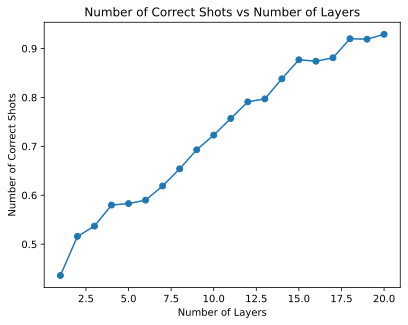

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(fidelity.keys()), list(fidelity.values()), 'o-')
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Correct Shots')
ax.set_title('Percentage of Correct Shots vs Number of Layers')
plt.show()

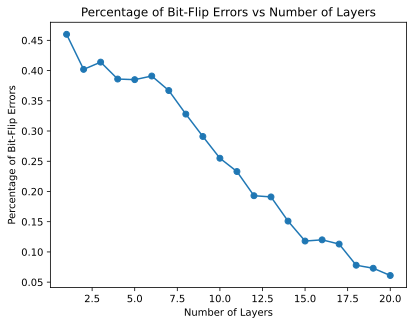

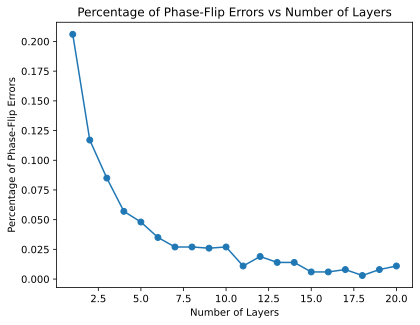

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(z_error_count.keys()), np.array(list(z_error_count.values()))/shot_length, 'o-')   # converted to percentage by dividing by the total number of shots
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Bit-Flip Errors')   # Errors when measuring in the Z basis
ax.set_title('Percentage of Bit-Flip Errors vs Number of Layers')
plt.show()

fig, ax = plt.subplots()
ax.plot(list(x_error_count.keys()), np.array(list(x_error_count.values()))/shot_length, 'o-')
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Phase-Flip Errors')     # Errors when measuring in the X basis
ax.set_title('Percentage of Phase-Flip Errors vs Number of Layers')
plt.show()

### 1000000 shots Was taking a long time to run

In [105]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

l = 1     # fixing the number of layers to 1
shot_lengths = [1_000, 10_000, 100_000, 1_000_000]
fidelity = {}
z_error_count = {}
x_error_count = {}

for shot_length in shot_lengths:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    
    z_error_count[shot_length] = z_error
    x_error_count[shot_length] = x_error
    fidelity[shot_length] = num_correct_shots/shot_length
    
    print(f"Number of shots: {shot_length}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    print(f"Fidelity: {num_correct_shots/shot_length}") # will track fidelity (the percentage of correct shots

Number of shots: 1000
Z error count:  512
X error count:  243
Number of correct shots:  364
Fidelity: 0.364
Number of shots: 10000
Z error count:  4611
X error count:  2367
Number of correct shots:  4113
Fidelity: 0.4113
Number of shots: 100000
Z error count:  46020
X error count:  24041
Number of correct shots:  41089
Fidelity: 0.41089


KeyboardInterrupt: 

In [110]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

l = 1     # fixing the number of layers to 1
shot_lengths = np.linspace(1_000, 100_000, dtype=int)
fidelity = {}
z_error_count = {}
x_error_count = {}

for shot_length in shot_lengths:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    
    z_error_count[shot_length] = z_error
    x_error_count[shot_length] = x_error
    fidelity[shot_length] = num_correct_shots/shot_length
    
    print(f"Number of shots: {shot_length}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    print(f"Fidelity: {num_correct_shots/shot_length}") # will track fidelity (the percentage of correct shots

Number of shots: 1000
Z error count:  464
X error count:  250
Number of correct shots:  411
Fidelity: 0.411
Number of shots: 1020
Z error count:  473
X error count:  219
Number of correct shots:  419
Fidelity: 0.4107843137254902
Number of shots: 1040
Z error count:  492
X error count:  251
Number of correct shots:  411
Fidelity: 0.3951923076923077
Number of shots: 1060
Z error count:  492
X error count:  246
Number of correct shots:  441
Fidelity: 0.4160377358490566
Number of shots: 1080
Z error count:  511
X error count:  228
Number of correct shots:  456
Fidelity: 0.4222222222222222
Number of shots: 1100
Z error count:  516
X error count:  277
Number of correct shots:  438
Fidelity: 0.3981818181818182
Number of shots: 1120
Z error count:  487
X error count:  273
Number of correct shots:  495
Fidelity: 0.4419642857142857
Number of shots: 1140
Z error count:  515
X error count:  260
Number of correct shots:  476
Fidelity: 0.41754385964912283
Number of shots: 1160
Z error count:  531
X 

Exception ignored in: <function _xla_gc_callback at 0x13c0260c0>
Traceback (most recent call last):
  File "/Users/roy-abhishek/VSCode/iQuHack2026/2026-QuEra-Technical-CUDAstudiedmore/.venv/lib/python3.13/site-packages/jax/_src/lib/__init__.py", line 124, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Number of shots: 7380
Z error count:  3407
X error count:  1643
Number of correct shots:  3108
Fidelity: 0.4211382113821138
Number of shots: 7400
Z error count:  3439
X error count:  1794
Number of correct shots:  3006
Fidelity: 0.40621621621621623
Number of shots: 7420
Z error count:  3462
X error count:  1763
Number of correct shots:  3025
Fidelity: 0.4076819407008086
Number of shots: 7440
Z error count:  3366
X error count:  1746
Number of correct shots:  3124
Fidelity: 0.4198924731182796


KeyboardInterrupt: 

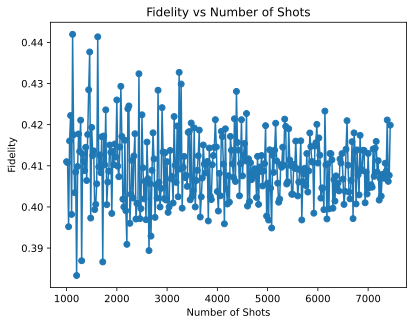

In [112]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(fidelity.keys()), list(fidelity.values()), 'o-')
ax.set_xlabel('Number of Shots')
ax.set_ylabel('Fidelity')
ax.set_title('Fidelity vs Number of Shots')
plt.show()

## Implementing the Original Noise Model

In [113]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

layers = np.arange(1, 21)

fidelity = {}
z_error_count = {}
x_error_count = {}

for l in layers:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel()   # No local phase-z errors
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    shot_length = 1000
    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    print(f"Layer number: {l}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    
    z_error_count[l] = z_error
    x_error_count[l] = x_error
    fidelity[l] = num_correct_shots/shot_length     # will track fidelity (the percentage of correct shots

Layer number: 1
Z error count:  472
X error count:  255
Number of correct shots:  384
Layer number: 2
Z error count:  402
X error count:  116
Number of correct shots:  528
Layer number: 3
Z error count:  399
X error count:  83
Number of correct shots:  556
Layer number: 4
Z error count:  407
X error count:  50
Number of correct shots:  560
Layer number: 5
Z error count:  376
X error count:  42
Number of correct shots:  600
Layer number: 6
Z error count:  395
X error count:  41
Number of correct shots:  575
Layer number: 7
Z error count:  362
X error count:  19
Number of correct shots:  624
Layer number: 8
Z error count:  311
X error count:  27
Number of correct shots:  673
Layer number: 9
Z error count:  284
X error count:  25
Number of correct shots:  697
Layer number: 10
Z error count:  265
X error count:  13
Number of correct shots:  725
Layer number: 11
Z error count:  240
X error count:  10
Number of correct shots:  752
Layer number: 12
Z error count:  206
X error count:  9
Number

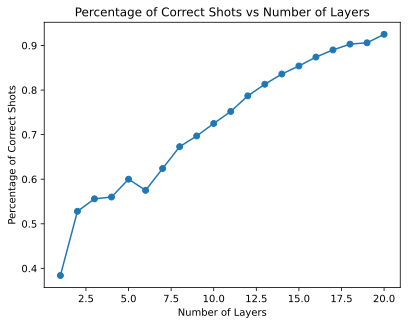

In [114]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(fidelity.keys()), list(fidelity.values()), 'o-')
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Correct Shots')
ax.set_title('Percentage of Correct Shots vs Number of Layers')
plt.show()

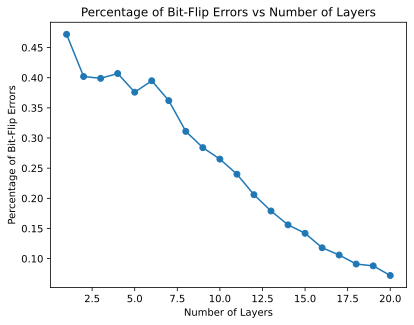

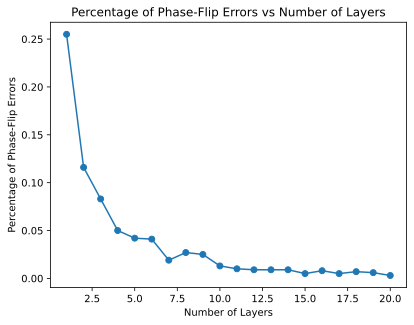

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(z_error_count.keys()), np.array(list(z_error_count.values()))/shot_length, 'o-')   # converted to percentage by dividing by the total number of shots
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Bit-Flip Errors')   # Errors when measuring in the Z basis
ax.set_title('Percentage of Bit-Flip Errors vs Number of Layers')
plt.show()

fig, ax = plt.subplots()
ax.plot(list(x_error_count.keys()), np.array(list(x_error_count.values()))/shot_length, 'o-')
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Percentage of Phase-Flip Errors')     # Errors when measuring in the X basis
ax.set_title('Percentage of Phase-Flip Errors vs Number of Layers')
plt.show()

In [116]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

l = 1     # fixing the number of layers to 1
shot_lengths = np.linspace(1_000, 100_000, 20, dtype=int)
fidelity = {}
z_error_count = {}
x_error_count = {}

for shot_length in shot_lengths:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel(local_pz=0.0, global_pz=0.0)
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    
    z_error_count[shot_length] = z_error
    x_error_count[shot_length] = x_error
    fidelity[shot_length] = num_correct_shots/shot_length
    
    print(f"Number of shots: {shot_length}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    print(f"Fidelity: {num_correct_shots/shot_length}") # will track fidelity (the percentage of correct shots

Number of shots: 1000
Z error count:  436
X error count:  236
Number of correct shots:  443
Fidelity: 0.443
Number of shots: 6210
Z error count:  2877
X error count:  1498
Number of correct shots:  2548
Fidelity: 0.41030595813204507
Number of shots: 11421
Z error count:  5331
X error count:  2669
Number of correct shots:  4656
Fidelity: 0.4076700814289467
Number of shots: 16631
Z error count:  7789
X error count:  3949
Number of correct shots:  6777
Fidelity: 0.4074920329505141
Number of shots: 21842
Z error count:  10108
X error count:  5154
Number of correct shots:  8971
Fidelity: 0.41072246131306656
Number of shots: 27052
Z error count:  12518
X error count:  6547
Number of correct shots:  11015
Fidelity: 0.4071787668194588
Number of shots: 32263
Z error count:  14921
X error count:  7644
Number of correct shots:  13254
Fidelity: 0.4108111458946781
Number of shots: 37473
Z error count:  17564
X error count:  8995
Number of correct shots:  15176
Fidelity: 0.40498492247751716
Number o

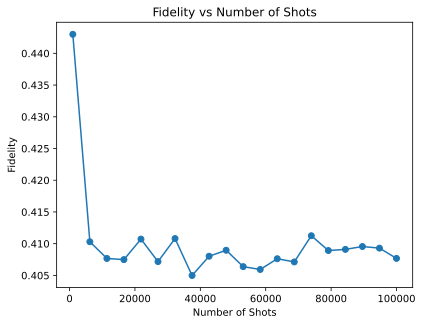

In [117]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(fidelity.keys()), list(fidelity.values()), 'o-')
ax.set_xlabel('Number of Shots')
ax.set_ylabel('Fidelity')
ax.set_title('Fidelity vs Number of Shots')
plt.show()

## Prolonging for as many cycles as we can

In [118]:
from bloqade.cirq_utils import noise
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import load_circuit
import numpy as np
from random import sample
import bloqade.stim

layers = [50]

fidelity = {}
z_error_count = {}
x_error_count = {}

for l in layers:
    # Creates circuit with desired number of layers 
    _n_layer_fixed = n_layer_fized(l)
    # Converts to cirq circuit
    cirq_main = emit_circuit(_n_layer_fixed)
    # Adds noise to the circuit. Changing just some of the channels: no local phase-z errors
    noise_model = noise.GeminiOneZoneNoiseModel()   # No local phase-z errors
    noisy = noise.transform_circuit(cirq_main, model=noise_model)
    squin_noisy = load_circuit(noisy)
    noisy_stim = bloqade.stim.Circuit(squin_noisy)

    shot_length = 1000
    sampler = noisy_stim.compile_sampler()
    samples = sampler.sample(shots=shot_length)

    z_error = 0
    x_error = 0
    idx_zerror = []
    idx_xerror = []
    index_list = [i for i in range(shot_length)] # 0..999

    for i, sample in enumerate(samples):
        z_results = dict()
        x_results = dict()
        for j in range(l):
            z_results[(j + 1)] = sample[j * 14: j * 14 + 7]
            x_results[(j + 1)] = sample[j * 14 + 7: (j + 1) * 14]

        z_stabilizers = dict()     # Stabilizer for measuring in the Z basis
        x_stabilizers = dict()     # Stabilizer for measuring in the X basis
        for j in range(l):
            z_stabilizers[(j + 1)] = green_blue_orange_stabilizers(z_results[(j + 1)])
            x_stabilizers[(j + 1)] = green_blue_orange_stabilizers(x_results[(j + 1)])
        
        if ideal_z_stabilizer not in z_stabilizers.values():
            z_error += 1
            # print(f"Z error at {i}")
            idx_zerror.append(i)
            index_list.remove(i)

        if ideal_x_stabilizer not in x_stabilizers.values():
            x_error += 1
            # print(f"X error at {i}")
            idx_xerror.append(i)
            if i in index_list: 
                index_list.remove(i)

    num_correct_shots = len(index_list)
    print(f"Layer number: {l}")
    print("Z error count: ", z_error)
    print("X error count: ", x_error)
    print("Number of correct shots: ", len(index_list))
    
    z_error_count[l] = z_error
    x_error_count[l] = x_error
    fidelity[l] = num_correct_shots/shot_length     # will track fidelity (the percentage of correct shots

Layer number: 50
Z error count:  1
X error count:  0
Number of correct shots:  999


In [119]:
@squin.kernel
def initialized_T():
    q = squin.qalloc(14)  # 2 registers × 7 qubits = 14 qubits
    
    squin.t(q[6])

    # √Y† on q[0–5], q[7–12] (parallel)
    for i in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]:
        squin.ry(angle=-1.5707963267948966, qubit=q[i])  # √Y† = RY(-π/2)

    # Hadamard gate to create the + logical state
    squin.h(q[13])
    
    # CZ gates
    for pair in [(1, 2), (3, 4), (5, 6), (8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[6], q[13] (parallel)
    squin.ry(angle=1.5707963267948966, qubit=q[6])
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # More CZ gates
    for pair in [(0, 3), (2, 5), (4, 6), (7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[2,3,4,5,6], q[9,10,11,12,13] (parallel)
    for i in [2, 3, 4, 5, 6, 9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # More CZ gates
    for pair in [(0, 1), (2, 3), (4, 5), (7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[1,2,4], q[8,9,11] (parallel)
    for i in [1, 2, 4, 8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    # Transversal CNOT
    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    # Measure the ancilla qubits
    for i in range(7, 14):
        squin.measure(q[i])

    # Reset the ancilla qubits so we do not waste resources
    for i in range(7, 14):
        squin.reset(q[i])

    # Prepare ancilla qubits for second measurement round
    for i in range(7, 13):
        squin.ry(angle=-1.5707963267948966, qubit=q[i])
    
    # CZ gates for second round
    for pair in [(8, 9), (10, 11), (12, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[13]
    squin.ry(angle=1.5707963267948966, qubit=q[13])
    
    # More CZ gates
    for pair in [(7, 10), (9, 12), (11, 13)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[9,10,11,12,13]
    for i in [9, 10, 11, 12, 13]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])
    
    # More CZ gates
    for pair in [(7, 8), (9, 10), (11, 12)]:
        squin.cz(control=q[pair[0]], target=q[pair[1]])
    
    # √Y on q[8,9,11]
    for i in [8, 9, 11]:
        squin.ry(angle=1.5707963267948966, qubit=q[i])

    # Transversal CNOT
    for pair in [(0, 7), (1, 8), (2, 9), (3, 10), (4, 11), (5, 12), (6, 13)]:
        squin.cx(control=q[pair[0]], target=q[pair[1]])

    # Hadamard gates for X-basis measurement
    for i in range(7):
        squin.h(q[7 + i])

    # X-basis measurement
    for i in range(7):
        squin.measure(q[7 + i])

# Visualize with white background
from IPython.display import HTML, display
tsim_circ = bloqade.tsim.Circuit(initialized_T)
diagram = tsim_circ.diagram(height=500)
# Get HTML and wrap with white background
html_str = diagram._repr_html_() if hasattr(diagram, '_repr_html_') else str(diagram)
display(HTML(f'<div style="background-color: white; padding: 20px; border: 1px solid #ddd; display: inline-block;">{html_str}</div>'))